In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df = pd.read_excel('young.xlsx')
df.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


In [3]:
df.shape

(20096, 13)

In [4]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [5]:
df.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


### Handling Missing Data

In [6]:
df.isnull().sum()

age                      0
gender                   0
region                   0
marital_status           0
number_of_dependants     0
bmi_category             0
smoking_status           2
employment_status        1
income_level             4
income_lakhs             0
medical_history          0
insurance_plan           0
annual_premium_amount    0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.shape

(20090, 13)

In [8]:
df.duplicated().sum()

0

### Cleaning Dataset (Numerical)

In [9]:
df.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267
std,2.294052,0.940713,23.420493,2749.906347
min,18.000000,-3.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.250000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


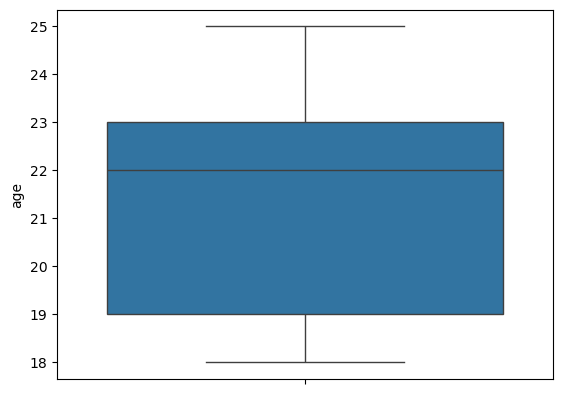

In [10]:
sns.boxplot(df['age'])
plt.show()

In [11]:
df1 = df[df['age'] < 100].copy()

In [12]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.718019,22.510851,8142.096267
std,2.294052,0.940713,23.420493,2749.906347
min,18.000000,-3.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.250000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


In [13]:
df1[df1.number_of_dependants<0].shape

(22, 13)

In [14]:
(df1['number_of_dependants'] < 0).sum()

22

In [15]:
df1['number_of_dependants'] = abs(df1['number_of_dependants'])

In [16]:
df1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20090.000000,20090.000000,20090.000000,20090.000000
mean,21.494375,0.722598,22.510851,8142.096267
std,2.294052,0.937200,23.420493,2749.906347
min,18.000000,0.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6022.250000
50%,22.000000,0.000000,16.000000,7939.000000
75%,23.000000,1.000000,31.000000,9561.000000
max,25.000000,3.000000,790.000000,18186.000000


<Axes: xlabel='income_lakhs', ylabel='Count'>

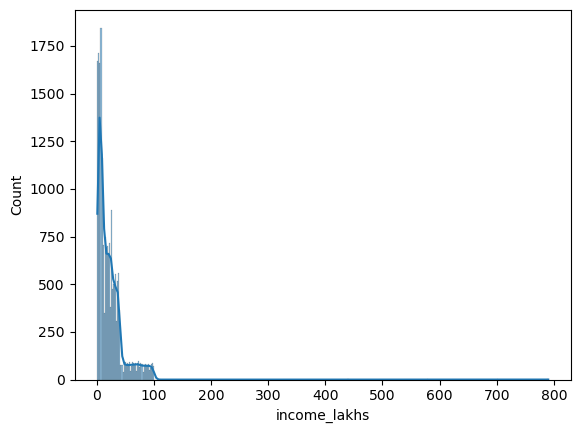

In [17]:
sns.histplot(df1['income_lakhs'], kde=True)

In [18]:
income_threshold = df1.income_lakhs.quantile(0.999)

df2 = df1[df1.income_lakhs < income_threshold].copy()
income_threshold

100.0

In [19]:
total_entries = df1[(df1['income_lakhs'] > 96) & (df1['income_lakhs'] < 100)].shape[0]
total_entries

125

In [20]:

df2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,20054.000000,20054.000000,20054.000000,20054.000000
mean,21.494016,0.722449,22.266530,8136.902413
std,2.294382,0.937033,21.526939,2748.132286
min,18.000000,0.000000,1.000000,3501.000000
25%,19.000000,0.000000,6.000000,6019.000000
50%,21.000000,0.000000,16.000000,7936.500000
75%,23.000000,1.000000,31.000000,9552.750000
max,25.000000,3.000000,99.000000,18186.000000


In [21]:
df2.columns

Index(['age', 'gender', 'region', 'marital_status', 'number_of_dependants',
       'bmi_category', 'smoking_status', 'employment_status', 'income_level',
       'income_lakhs', 'medical_history', 'insurance_plan',
       'annual_premium_amount'],
      dtype='object')

In [22]:
df2['smoking_status'].value_counts()

smoking_status
No Smoking        13829
Regular            4482
Occasional         1733
Smoking=0             5
Does Not Smoke        3
Not Smoking           2
Name: count, dtype: int64

<Axes: ylabel='annual_premium_amount'>

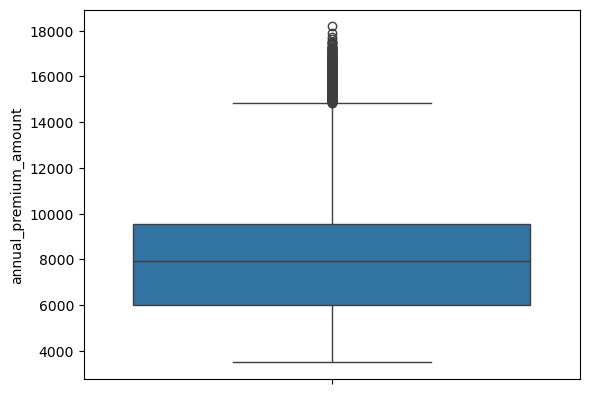

In [23]:
sns.boxplot(df2['annual_premium_amount'])

In [24]:
col_num = df.describe().columns
col_num

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

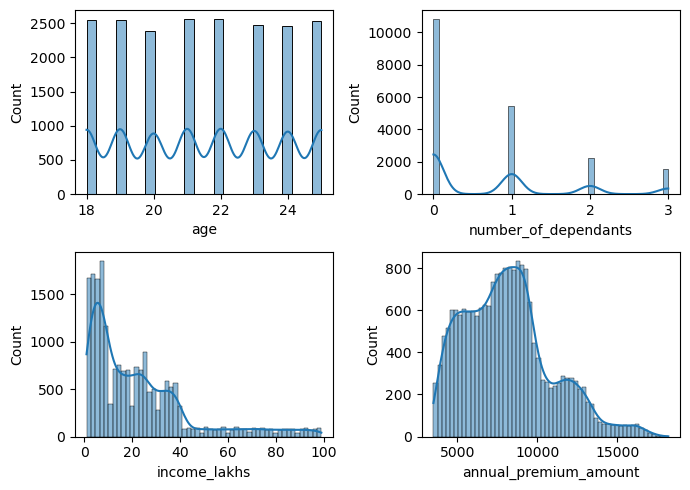

In [25]:
#for i in col:
 #   plt.figure(figsize=(10, 10))
  #  sns.histplot(df2[i], kde=True)
   # plt.show()

fig, axes = plt.subplots(2, 2, figsize=(7, 5))  # Create a 2x2 grid of subplots
axes = axes.flatten()  # Flatten the 2D array for easy indexing

for idx, i in enumerate(col_num):  
    sns.histplot(df2[i], kde=True, ax=axes[idx])  # Plot on the respective subplot
    #axes[idx].set_title(f"Distribution of {i}")

plt.tight_layout()  # Adjust spacing to avoid overlap
plt.show()


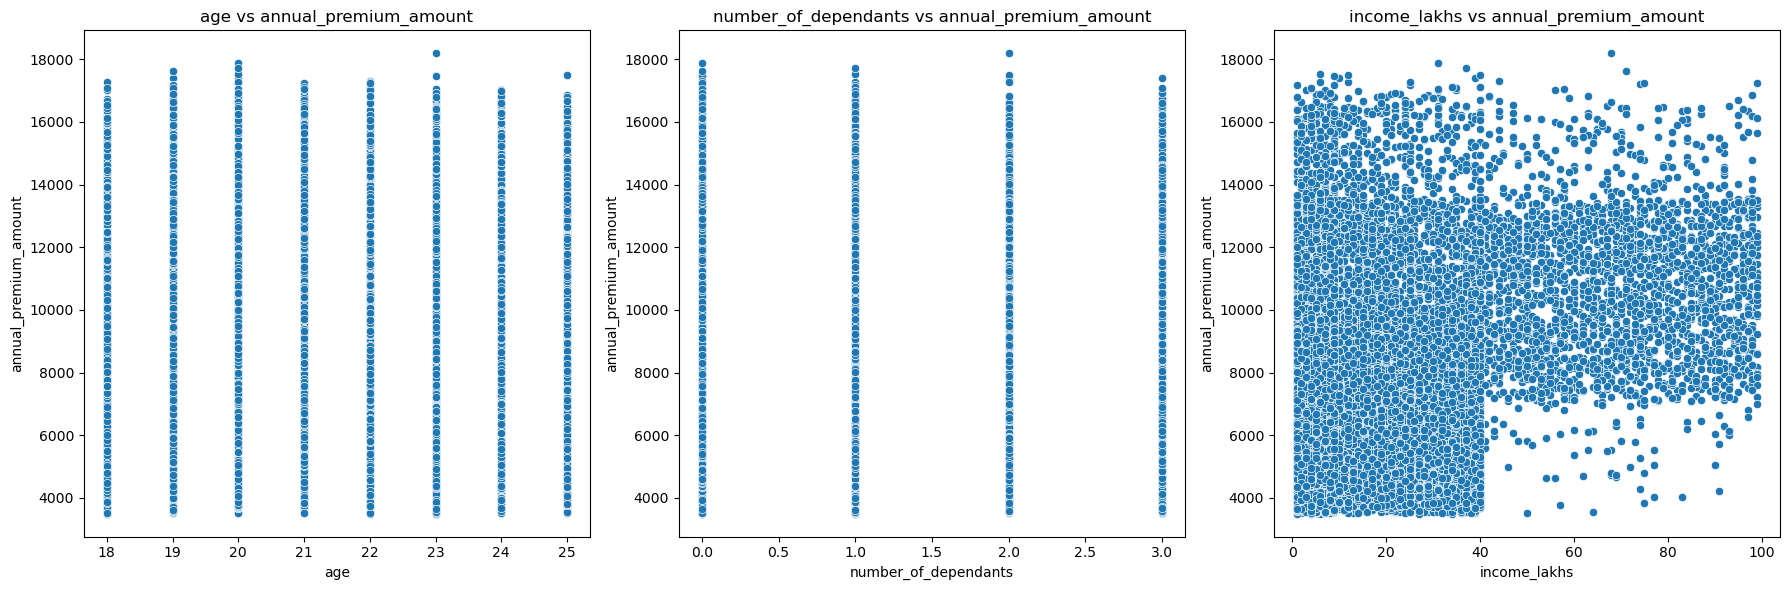

In [26]:
col_variables = ['age', 'number_of_dependants', 'income_lakhs']
col_amount = 'annual_premium_amount'

fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Create 1 row, 3 columns of subplots

for idx, feature in enumerate(col_variables):
    sns.scatterplot(x=df2[feature], y=df2[col_amount], ax=axes[idx])
    axes[idx].set_title(f"{feature} vs {col_amount}")

plt.tight_layout()  # Adjust spacing
plt.show()

### Cleaning Dataset (Categorial)

In [27]:
col_cat = df.columns.drop(col_num)
col_cat



Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [28]:
for i in col_cat:
    print(f'{i} : {df2[i].unique()}')

gender : ['Male' 'Female']
region : ['Northeast' 'Northwest' 'Southeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Overweight' 'Underweight' 'Normal' 'Obesity']
smoking_status : ['Regular' 'No Smoking' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Self-Employed' 'Freelancer' 'Salaried']
income_level : ['> 40L' '<10L' '10L - 25L' '25L - 40L']
medical_history : ['High blood pressure' 'No Disease' 'Diabetes & High blood pressure'
 'Diabetes & Heart disease' 'Diabetes' 'Diabetes & Thyroid'
 'Heart disease' 'Thyroid' 'High blood pressure & Heart disease']
insurance_plan : ['Silver' 'Bronze' 'Gold']


In [29]:
df2['smoking_status'].replace({'Smoking=0': 'No Smoking',
                               'Does Not Smoke': 'No Smoking',
                               'Not Smoking': 'No Smoking'}, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_10056\1853564941.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['smoking_status'].replace({'Smoking=0': 'No Smoking',


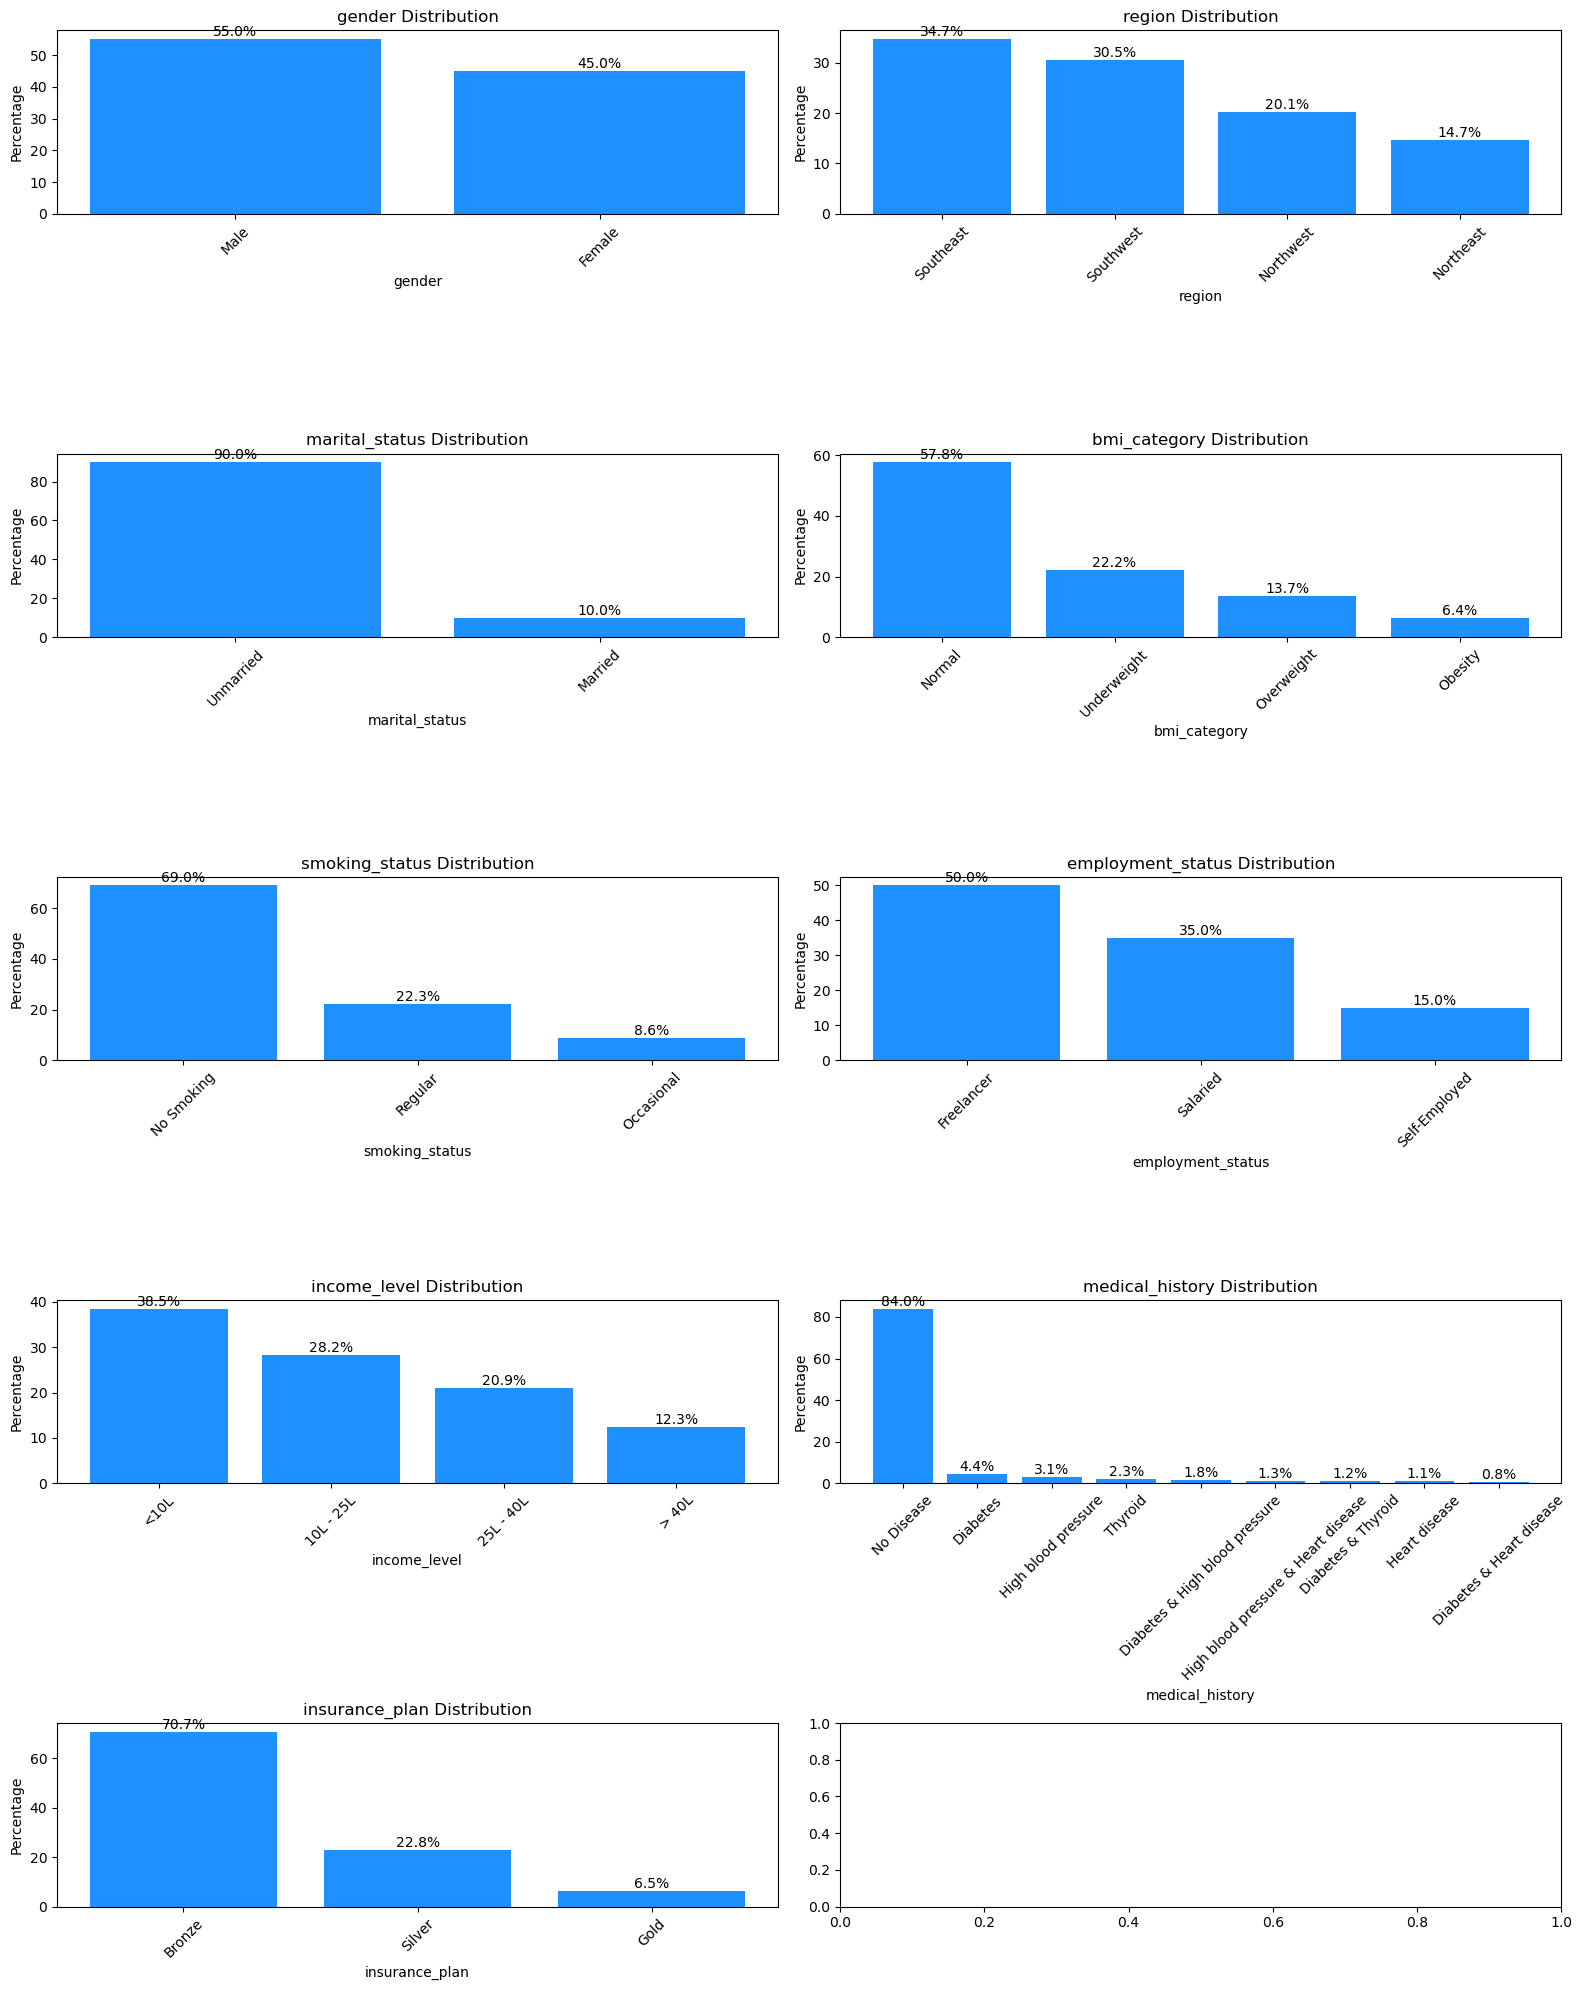

In [30]:
fig, axes = plt.subplots(5, 2, figsize=(16, 20))  # 3x3 grid
axes = axes.flatten()  # Flatten to iterate easily

for idx, col in enumerate(col_cat):
    percentage = df2[col].value_counts(normalize=True) * 100  # Get percentage
    bars = axes[idx].bar(percentage.index, percentage.values, color='dodgerblue')  # Darker bars
    axes[idx].set_title(f"{col} Distribution")
    axes[idx].set_ylabel("Percentage")
    axes[idx].set_xlabel(col)
    axes[idx].tick_params(axis='x', rotation=45)  # Rotate labels for readability
    
    # Add percentage labels on top of bars
    for bar in bars:
        height = bar.get_height()
        axes[idx].text(bar.get_x() + bar.get_width()/2, height, f'{height:.1f}%', 
                       ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()  # Adjust layout
plt.show()

In [31]:
df2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712


In [32]:
df2.medical_history.unique()

array(['High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Diabetes & Heart disease',
       'Diabetes', 'Diabetes & Thyroid', 'Heart disease', 'Thyroid',
       'High blood pressure & Heart disease'], dtype=object)

In [33]:
risk_score = {
    'diabetes': 6,  
    'high blood pressure': 6,  
    'thyroid': 5,
    'heart disease': 8,
    'no disease': 0,  
    'none': 0, 
}                   # this score needs to be discussed with buisness owner

df2[['disease1', 'disease2']] = df2['medical_history'].str.split('&', expand=True).apply(lambda x: x.str.lower())


In [34]:
df2.head(25)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,None
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,None
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,None
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,no disease,None
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,no disease,None
5,22,Female,Southwest,Unmarried,0,Underweight,Regular,Freelancer,25L - 40L,30,High blood pressure,Gold,15473,high blood pressure,None
6,19,Male,Southwest,Unmarried,0,Normal,No Smoking,Freelancer,<10L,8,No Disease,Bronze,4097,no disease,None
7,18,Female,Northwest,Unmarried,1,Underweight,No Smoking,Salaried,<10L,5,Diabetes & High blood pressure,Bronze,8187,diabetes,high blood pressure
8,23,Male,Northwest,Unmarried,0,Underweight,No Smoking,Salaried,<10L,8,No Disease,Bronze,5387,no disease,None
9,20,Female,Northeast,Unmarried,0,Normal,Occasional,Salaried,10L - 25L,18,No Disease,Bronze,8866,no disease,None


In [35]:
df2.disease1.isnull().sum(), df2.disease2.isnull().sum(), df2.disease2.value_counts()

(0,
 19051,
 disease2
 heart disease          416
 high blood pressure    353
 thyroid                234
 Name: count, dtype: int64)

In [36]:
# Clean disease columns (remove extra spaces and convert to lowercase)
df2['disease1'] = df2['disease1'].str.strip().str.lower()
df2['disease2'] = df2['disease2'].str.strip().str.lower()


In [37]:
df2['disease1'] = df2['disease1'].fillna('none')  # Handle NaN values
df2['disease2'] = df2['disease2'].fillna('none')  # Handle NaN values

df2['total_risk_score'] = 0  # Initialize column

# Loop over disease columns to sum up the risk scores
for disease in ['disease1', 'disease2']:
    # Apply the risk score mapping and fill NaN with 0
    df2['total_risk_score'] += df2[disease].map(risk_score).fillna(0)

# Check the results of total_risk_score
print(df2[['disease1', 'disease2', 'total_risk_score']].head())

# Now normalize the risk score
maxx = df2['total_risk_score'].max()
minn = df2['total_risk_score'].min()
df2['normalized_risk_score'] = (df2['total_risk_score'] - minn) / (maxx - minn)

# Check the normalized risk scores
df2.head()


              disease1 disease2  total_risk_score
0  high blood pressure     none                 6
1           no disease     none                 0
2           no disease     none                 0
3           no disease     none                 0
4           no disease     none                 0


,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_score,normalized_risk_score
0,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571
1,22,Female,Northwest,Unmarried,0,Underweight,No Smoking,Freelancer,<10L,3,No Disease,Silver,11050,no disease,none,0,0.000000
2,21,Female,Southeast,Unmarried,0,Normal,Regular,Salaried,> 40L,97,No Disease,Silver,11857,no disease,none,0,0.000000
3,25,Male,Southeast,Unmarried,0,Normal,No Smoking,Freelancer,10L - 25L,15,No Disease,Bronze,5684,no disease,none,0,0.000000
4,20,Male,Southeast,Unmarried,2,Overweight,No Smoking,Freelancer,10L - 25L,14,No Disease,Bronze,5712,no disease,none,0,0.000000


In [38]:
maxx, minn

(14, 0)

In [39]:
df2['insurance_plan'] = df2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})


In [40]:
df2.income_level.unique()

array(['> 40L', '<10L', '10L - 25L', '25L - 40L'], dtype=object)

In [41]:
df2['income_level'] = df2['income_level'].map({'<10L': 1, '10L - 25L': 2, '> 40L': 4, '25L - 40L':3})


In [42]:
col_nominal = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status','employment_status']

In [43]:
df3 = pd.get_dummies(df2, columns=col_nominal, drop_first=True, dtype=int)

In [44]:
df3.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'medical_history', 'insurance_plan', 'annual_premium_amount',
       'disease1', 'disease2', 'total_risk_score', 'normalized_risk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [45]:
df4 = df3.drop(['medical_history', 'disease1', 'disease2', 'total_risk_score'], axis=1)

In [46]:
df4.columns

Index(['age', 'number_of_dependants', 'income_level', 'income_lakhs',
       'insurance_plan', 'annual_premium_amount', 'normalized_risk_score',
       'gender_Male', 'region_Northwest', 'region_Southeast',
       'region_Southwest', 'marital_status_Unmarried', 'bmi_category_Obesity',
       'bmi_category_Overweight', 'bmi_category_Underweight',
       'smoking_status_Occasional', 'smoking_status_Regular',
       'employment_status_Salaried', 'employment_status_Self-Employed'],
      dtype='object')

In [47]:
df4.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,22,0,1,3,2,11050,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,21,0,4,97,2,11857,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,25,0,2,15,1,5684,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,20,2,2,14,1,5712,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


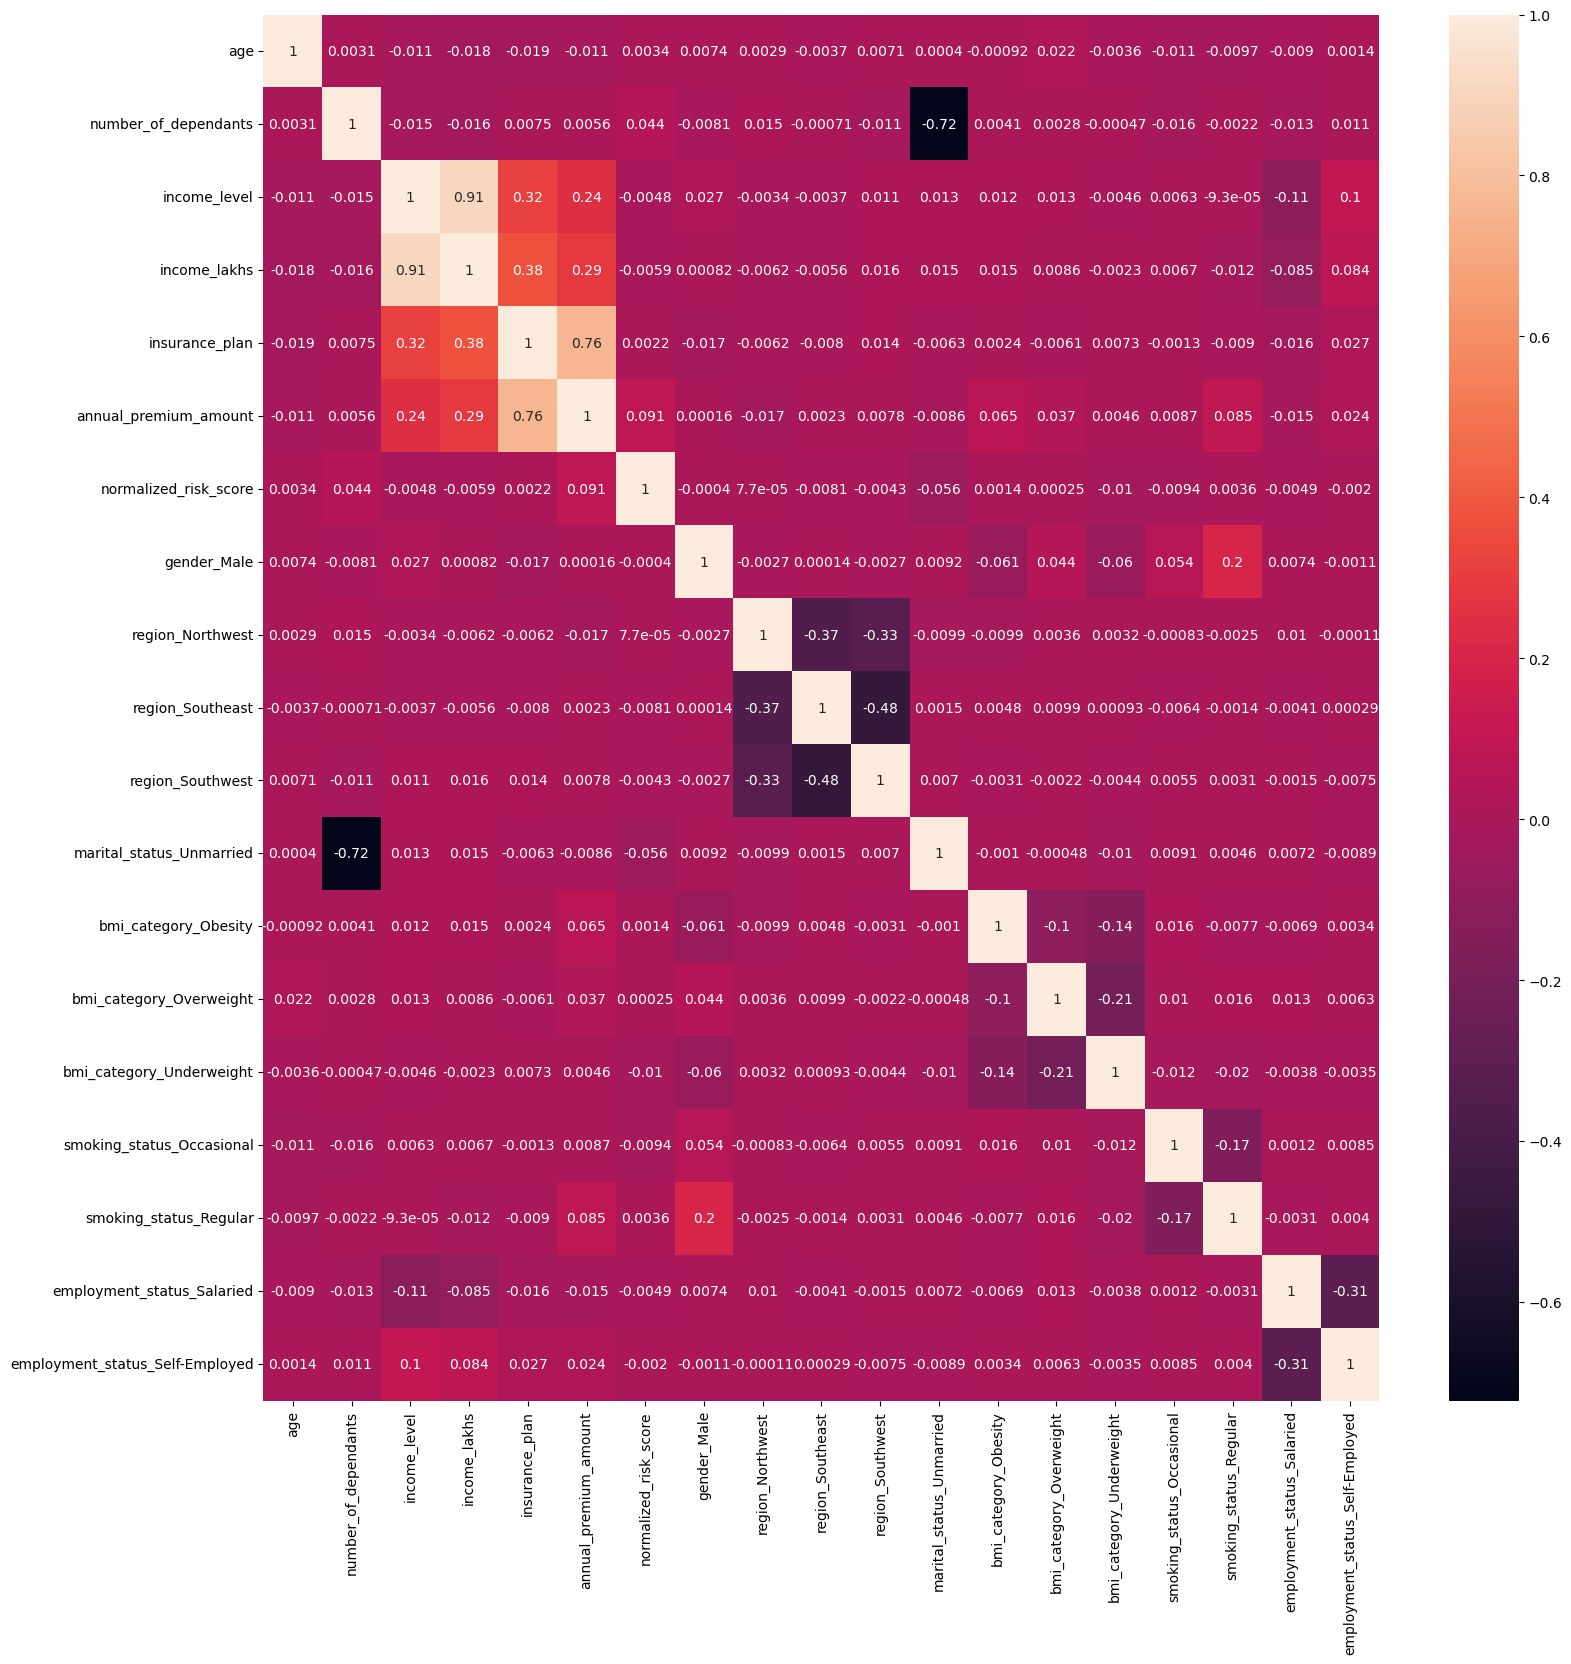

In [48]:
cm = df4.corr()

plt.figure(figsize=(18, 18))
sns.heatmap(cm, annot=True)
plt.show()

In [49]:
df4.head(1)

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


### Feature Engineering

In [50]:
X = df4.drop('annual_premium_amount', axis=1)
y = df4['annual_premium_amount']

from sklearn.preprocessing import MinMaxScaler
col_to_scale = ['age', 'number_of_dependants','income_level' ,'income_lakhs', 'insurance_plan']
scaler = MinMaxScaler()

X[col_to_scale] = scaler.fit_transform(X[col_to_scale])
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,1.000000,1.000000,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.000000,0.020408,0.5,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,1.000000,0.979592,0.5,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.333333,0.142857,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.333333,0.132653,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


In [51]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000,20054.000000
mean,0.499145,0.240816,0.356970,0.217005,0.178967,0.092130,0.550364,0.201306,0.346863,0.304578,0.899920,0.063528,0.136531,0.222300,0.086417,0.223497,0.350155,0.149945
std,0.327769,0.312344,0.346809,0.219663,0.299827,0.230059,0.497469,0.400987,0.475984,0.460240,0.300114,0.243917,0.343360,0.415802,0.280985,0.416599,0.477030,0.357027
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.000000,0.051020,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.428571,0.000000,0.333333,0.153061,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714286,0.333333,0.666667,0.306122,0.500000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['feature'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

In [53]:
calculate_vif(X)

,feature,VIF
0,age,3.142125
1,number_of_dependants,1.860137
2,income_level,12.076228
3,income_lakhs,12.064125
4,insurance_plan,1.586966
5,normalized_risk_score,1.154327
6,gender_Male,2.309901
7,region_Northwest,2.147121
8,region_Southeast,2.968665
9,region_Southwest,2.730084


In [54]:
calculate_vif(X.drop('income_level', axis=1))

,feature,VIF
0,age,3.140709
1,number_of_dependants,1.857617
2,income_lakhs,2.293723
3,insurance_plan,1.581668
4,normalized_risk_score,1.154291
5,gender_Male,2.299671
6,region_Northwest,2.146229
7,region_Southeast,2.967484
8,region_Southwest,2.729448
9,marital_status_Unmarried,7.305480


In [55]:
X_reduced = X.drop('income_level', axis=1)
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.000000,0.000000,1.000000,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1
1,0.571429,0.000000,0.020408,0.5,0.000000,0,1,0,0,1,0,0,1,0,0,0,0
2,0.428571,0.000000,0.979592,0.5,0.000000,0,0,1,0,1,0,0,0,0,1,1,0
3,1.000000,0.000000,0.142857,0.0,0.000000,1,0,1,0,1,0,0,0,0,0,0,0
4,0.285714,0.666667,0.132653,0.0,0.000000,1,0,1,0,1,0,1,0,0,0,0,0


### Model Training 

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=11)

In [57]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14037, 17), (6017, 17), (14037,), (6017,))

In [58]:
from sklearn.linear_model import LinearRegression

model_lr = LinearRegression()

model_lr.fit(X_train, y_train)
train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)

train_score, test_score

(0.6013972024171412, 0.6045064274515999)

In [59]:
model_lr.coef_, model_lr.intercept_

(array([ 2.28509622e+01, -8.78480082e+01,  1.25365740e+01,  6.96411889e+03,
         1.09267560e+03,  5.64421731e+00, -1.47821516e+02, -9.99987904e+00,
        -5.58095579e+01, -4.50647276e+00,  8.01117285e+02,  4.41977362e+02,
         1.79768840e+02,  2.37569665e+02,  6.13447556e+02,  2.47470321e+00,
        -1.19879405e+01]),
 6545.652013235112)

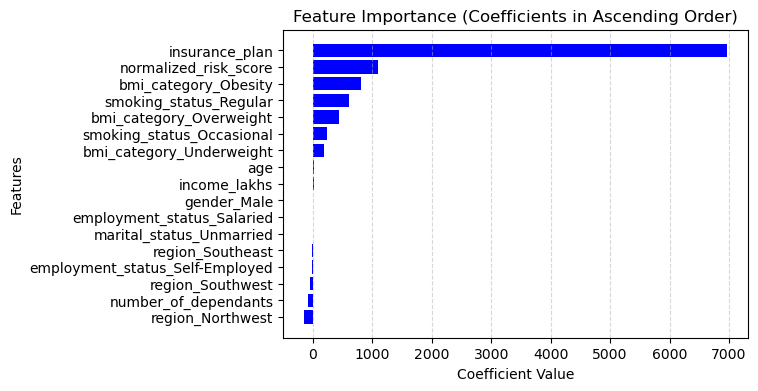

In [60]:
feature_names = X_train.columns

# Convert to DataFrame for easy sorting
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': model_lr.coef_})

# Sort by coefficient values in ascending order
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)

# Plot
plt.figure(figsize=(6, 4))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='blue')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance (Coefficients in Ascending Order)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

In [61]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# Define models and hyperparameters
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}  # No hyperparameters to tune for Linear Regression
    },
    'Ridge': {
        'model': Ridge(),
        'params': {'alpha': uniform(0.1, 10)}  # Tuning alpha for Ridge
    },
    'Lasso': {
        'model': Lasso(),
        'params': {'alpha': uniform(0.01, 1)}  # Tuning alpha for Lasso
    },
    'XGBoost': {
        'model': XGBRegressor(objective='reg:squarederror', random_state=42),
        'params': {
            'n_estimators': np.arange(50, 300, 50),
            'learning_rate': uniform(0.01, 0.3),
            'max_depth': np.arange(3, 10),
            'subsample': uniform(0.5, 0.5),
            'colsample_bytree': uniform(0.5, 0.5)
        }
    }
}

# Dictionary to store best models
best_models = {}

# Loop through each model and perform RandomizedSearchCV
for name, model_info in models.items():
    clf = RandomizedSearchCV(model_info['model'], model_info['params'], n_iter=10, cv=5, scoring='r2', n_jobs=-1, random_state=42)
    clf.fit(X_train, y_train)
    
    best_models[name] = clf.best_estimator_

# Display the best models for each algorithm
best_models


d:\Anaconda\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'LinearRegression': LinearRegression(),
 'Ridge': Ridge(alpha=1.6599452033620266),
 'Lasso': Lasso(alpha=0.9607143064099162),
 'XGBoost': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8540362888980227, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.016175348288740735, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)}

In [83]:
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)

train_score = model_xgb.score(X_train, y_train)
test_score = model_xgb.score(X_test, y_test)
train_score, test_score

(0.7243064045906067, 0.5671440362930298)

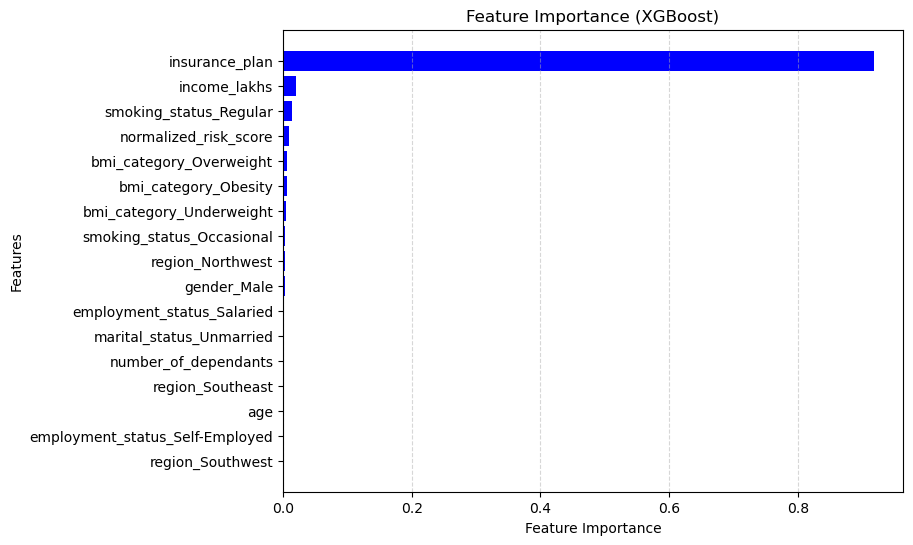

In [63]:
# Get feature importance from the best XGBoost model
model_xgb = best_models['XGBoost']
feature_importance = model_xgb.feature_importances_

# Create DataFrame
coef_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort in ascending order
coef_df = coef_df.sort_values(by='Importance', ascending=True)

# Plot
plt.figure(figsize=(8, 6))
plt.barh(coef_df['Feature'], coef_df['Importance'], color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance (XGBoost)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

### Error Analysis

In [64]:
y_pred = best_models['XGBoost'].predict(X_test)
residuals = y_pred - y_test 
residuals_pct = (residuals / y_test) * 100

In [65]:
result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'diff': residuals, 'diff (%)': residuals_pct})
result_df.info(),  result_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6017 entries, 18369 to 1121
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Actual     6017 non-null   int64  
 1   Predicted  6017 non-null   float32
 2   diff       6017 non-null   float64
 3   diff (%)   6017 non-null   float64
dtypes: float32(1), float64(2), int64(1)
memory usage: 211.5 KB


(None,
        Actual     Predicted         diff   diff (%)
 18369    7884  10057.667969  2173.667969  27.570624
 12690    9371   6669.253906 -2701.746094 -28.830926
 18735    5782   6777.389648   995.389648  17.215317
 4874    12292  10658.979492 -1633.020508 -13.285230
 18648    9009   6753.856934 -2255.143066 -25.032113)

<Axes: xlabel='diff (%)', ylabel='Count'>

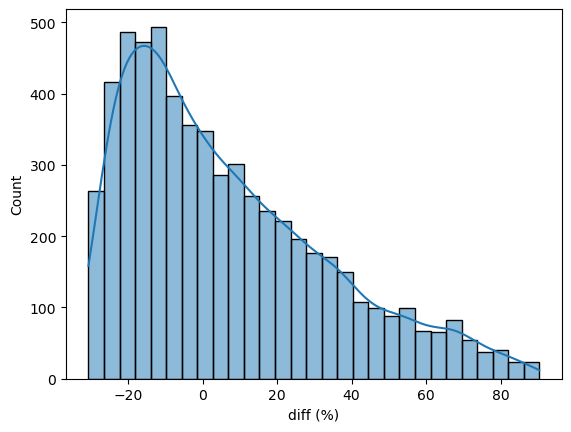

In [66]:
sns.histplot(result_df['diff (%)'], kde=True)


In [67]:
extreme_error_threshold = 10

extreme_result_df = result_df[np.abs(result_df['diff (%)']) > extreme_error_threshold]
extreme_result_df.head()

,Actual,Predicted,diff,diff (%)
18369,7884,10057.667969,2173.667969,27.570624
12690,9371,6669.253906,-2701.746094,-28.830926
18735,5782,6777.389648,995.389648,17.215317
4874,12292,10658.979492,-1633.020508,-13.285230
18648,9009,6753.856934,-2255.143066,-25.032113


In [68]:
extreme_result_df.shape[0]*100/result_df.shape[0]  #total around 30% of data is having error more than 10%

72.61093568223367

In [69]:
result_df.sort_values(by='diff (%)', ascending=False)

,Actual,Predicted,diff,diff (%)
7624,3502,6669.107422,3167.107422,90.437105
18500,3508,6672.005859,3164.005859,90.194010
12058,3503,6637.365723,3134.365723,89.476612
2975,3503,6630.081543,3127.081543,89.268671
19094,3531,6672.005859,3141.005859,88.955136
...,...,...,...,...
10762,10056,7015.197266,-3040.802734,-30.238691
869,9686,6747.500977,-2938.499023,-30.337591
3720,10615,7388.682129,-3226.317871,-30.393951
20095,9490,6604.392090,-2885.607910,-30.406827


In [70]:

extreme_error_df = X_test.loc[extreme_result_df.index]
extreme_error_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_risk_score,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
18369,0.142857,0.000000,0.724490,0.5,0.0,0,0,0,0,1,0,0,0,0,0,1,0
12690,0.571429,0.666667,0.081633,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0
18735,0.000000,0.000000,0.051020,0.0,0.0,1,0,0,0,1,0,0,1,0,0,1,0
4874,0.285714,0.000000,0.438776,0.5,0.0,1,0,1,0,1,0,0,0,0,1,0,1
18648,0.857143,0.000000,0.204082,0.0,0.0,1,0,1,0,1,0,0,0,1,0,1,0


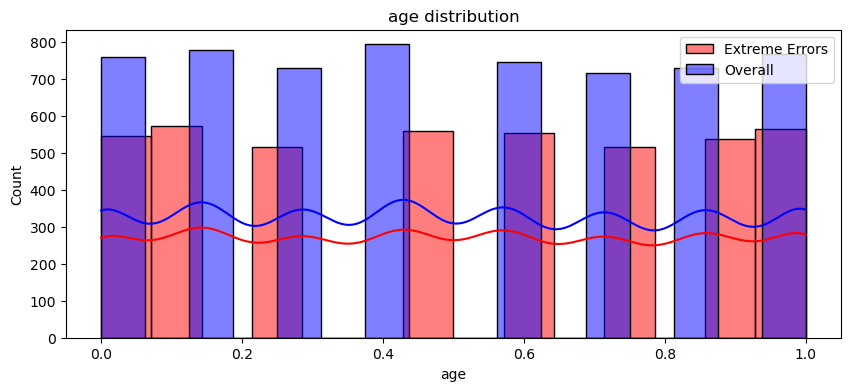

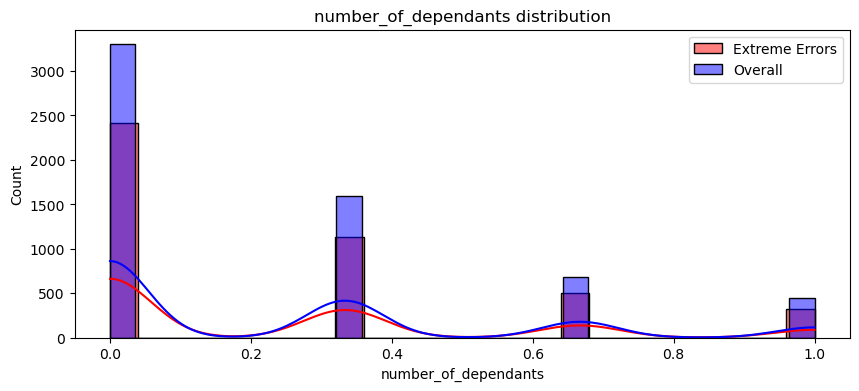

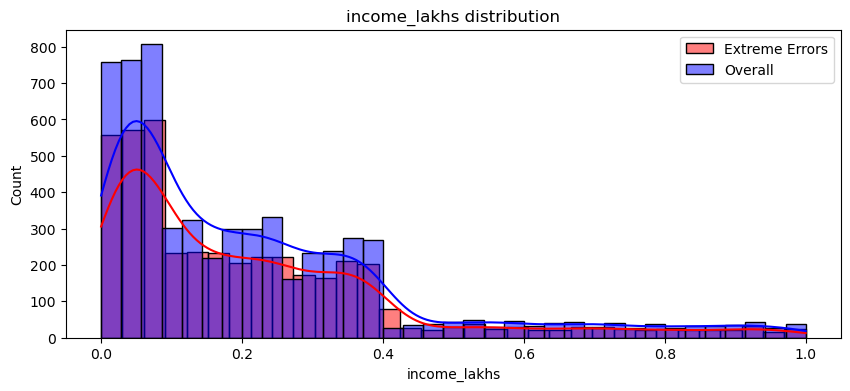

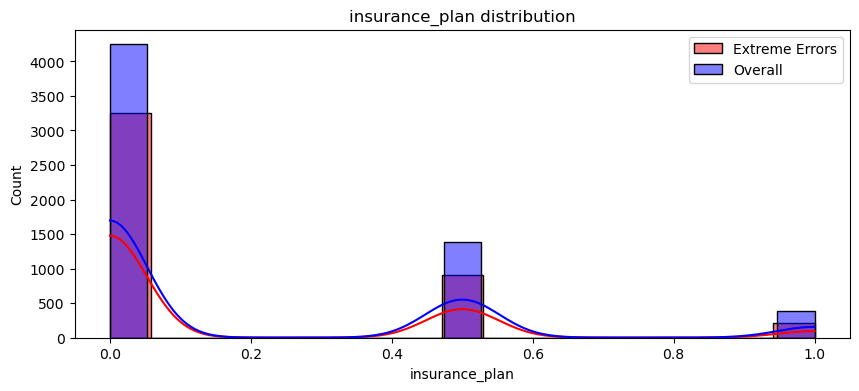

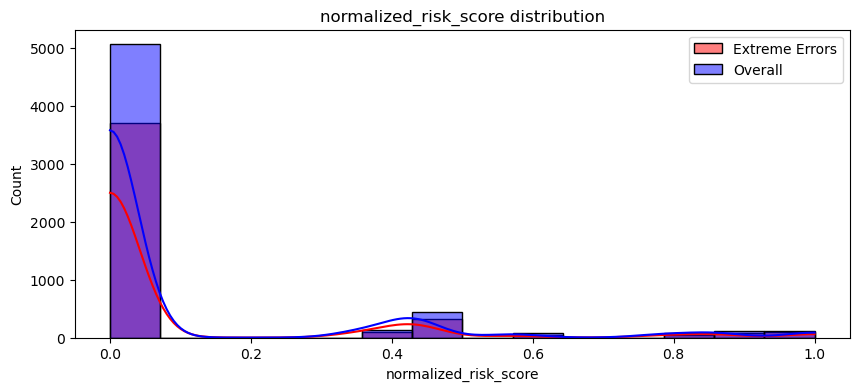

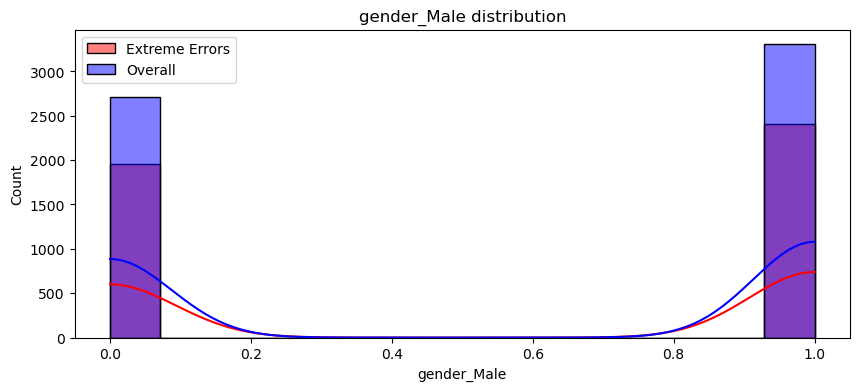

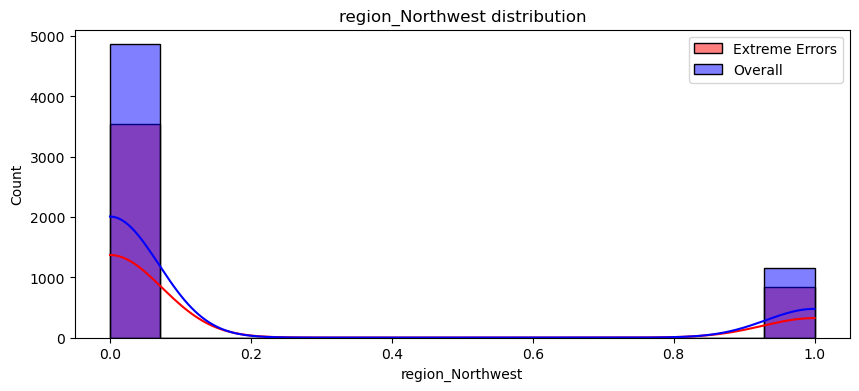

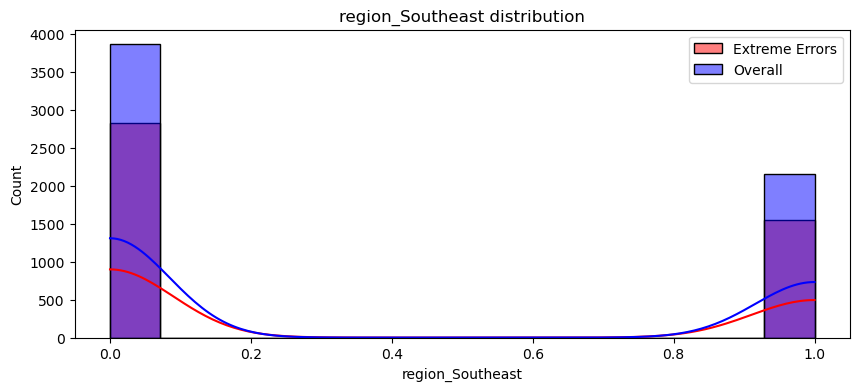

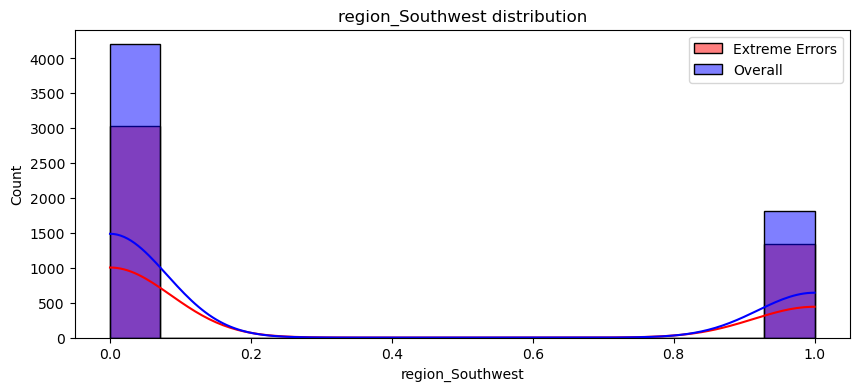

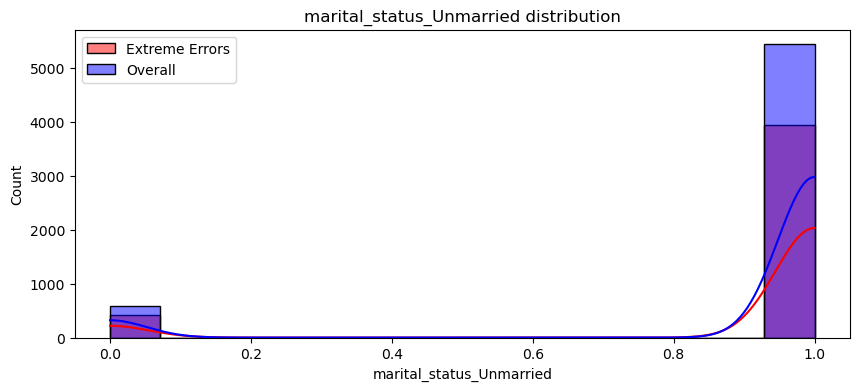

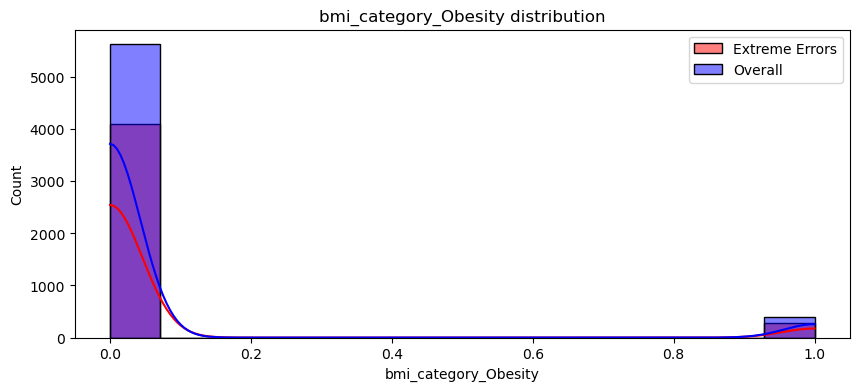

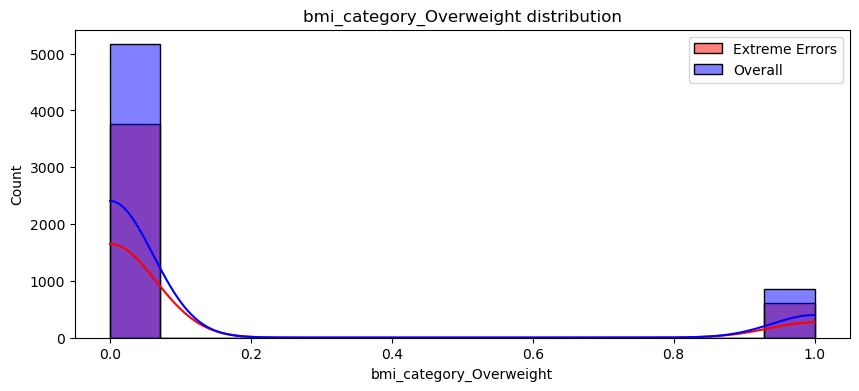

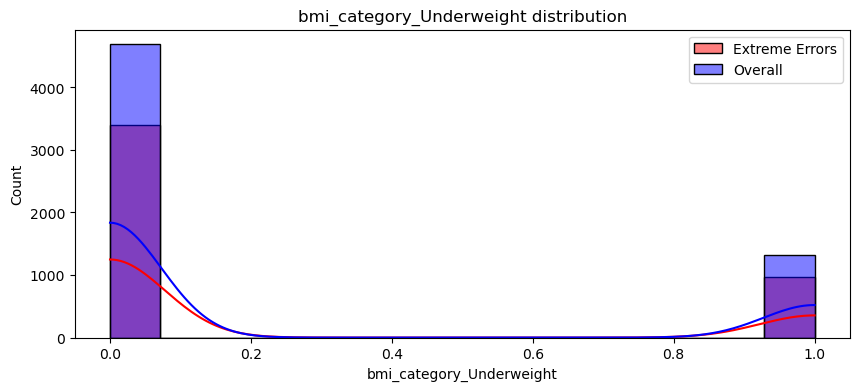

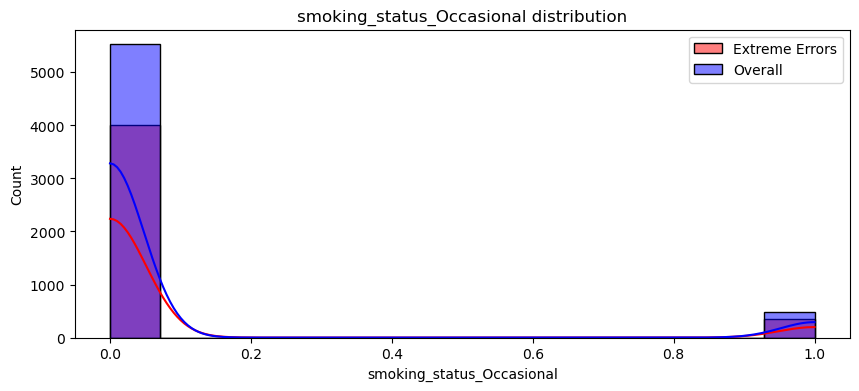

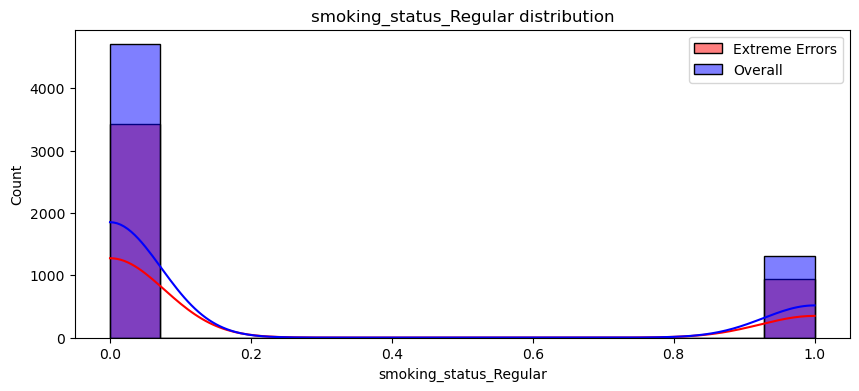

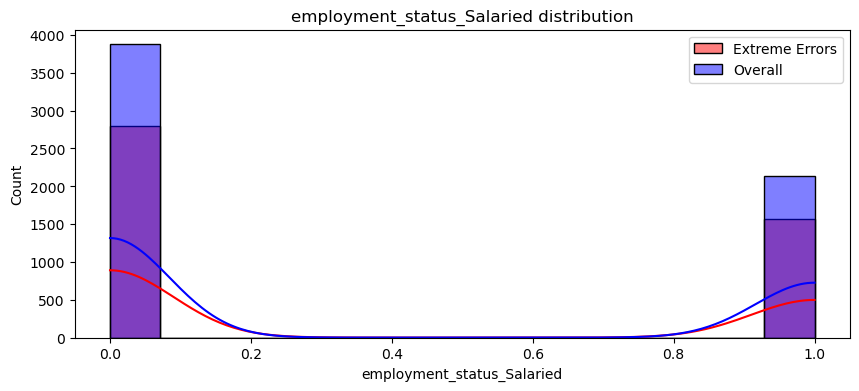

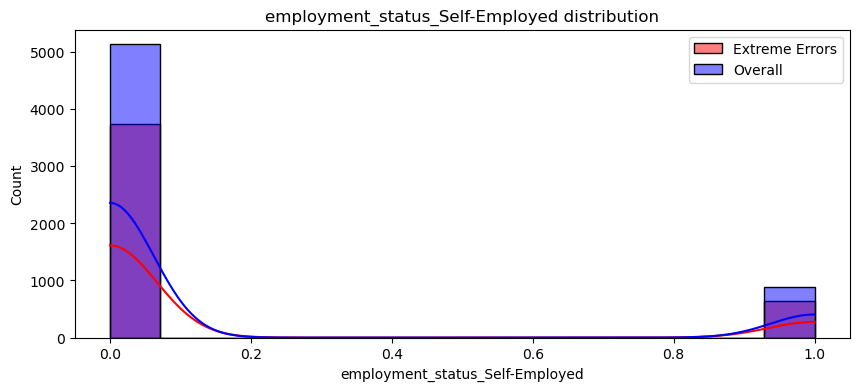

In [71]:
for feature in X_test.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(extreme_error_df[feature], color='red', label='Extreme Errors', kde=True)
    sns.histplot(X_test[feature], color='blue', label='Overall', kde=True)
    plt.title(f"{feature} distribution")
    plt.legend()  # To show labels properly
    plt.show()

<Axes: xlabel='age', ylabel='Count'>

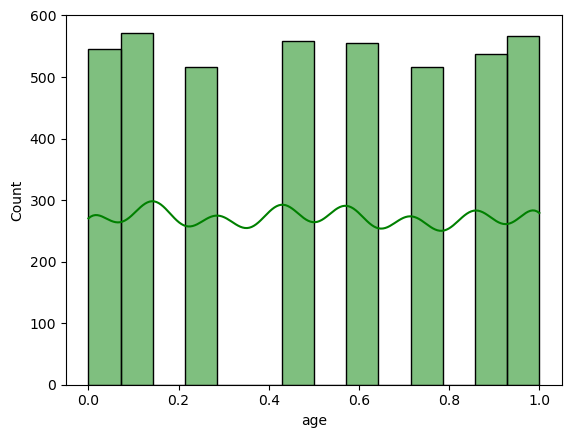

In [72]:
sns.histplot(extreme_error_df['age'], color='green', label='Extreme Errors', kde=True)

In [73]:
extreme_error_df['income_level'] = 1  # no matter wahat income level is, so, we are going to set it to 1
df_reversed = pd.DataFrame()
df_reversed[col_to_scale] = scaler.inverse_transform(extreme_error_df[col_to_scale])
df_reversed


,age,number_of_dependants,income_level,income_lakhs,insurance_plan
0,19.0,0.0,4.0,72.0,2.0
1,22.0,2.0,4.0,9.0,1.0
2,18.0,0.0,4.0,6.0,1.0
3,20.0,0.0,4.0,44.0,2.0
4,24.0,0.0,4.0,21.0,1.0
...,...,...,...,...,...
4364,22.0,1.0,4.0,7.0,2.0
4365,20.0,0.0,4.0,93.0,1.0
4366,20.0,0.0,4.0,10.0,1.0
4367,21.0,0.0,4.0,25.0,3.0


In [74]:
extreme_error_df.drop('income_level', axis=1, inplace=True)

<Axes: xlabel='age', ylabel='Count'>

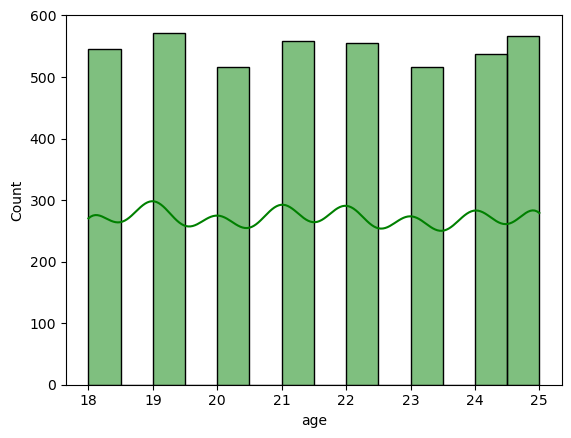

In [75]:
sns.histplot(df_reversed['age'], color='green', label='Extreme Errors', kde=True)

In [76]:
df_reversed['age'].quantile(0.98)

25.0